<h1 style="color: white; background-color: #3498db; font-family: 'Arial', sans-serif; text-align: center; padding: 10px; border-radius: 8px;">KNN for Social Network Ads</h1>


# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
import sklearn

In [2]:
df=pd.read_csv("D:\Machine Learning\Machine-Learning\Data\Social_Network_Ads.csv")

# Data Exploration

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print(f"The shape of the dataset  is :{df.shape}")
print(f"The size of the dataset  is :{df.size} \n")
print(f"The columns in the dataset is:{df.columns}")

The shape of the dataset  is :(400, 5)
The size of the dataset  is :2000 

The columns in the dataset is:Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


* The average age of individuals in the dataset is approximately 37.66 years.
* The age range of individuals is from 18 to 60 years.
* The average estimated salary of individuals is approximately $69,742.50.The estimated salary ranges from $15,000 to $150,000.
* The 'Purchased' variable is binary, indicating whether an individual made a purchase (1) or not (0).

# Data Cleaning

In [7]:
if df.isnull().sum().any()>0:
    print(f"There are {df.isnull.sum()} number of null values in the dataset")
else:
    print(f"There are no null values in the dataset")

There are no null values in the dataset


In [8]:
if df.duplicated().any()>0:
    print(f"The number of duplicated rows in the datasets are {df.duplicated().sum()}")
else:
    print(f'There are no duplicated rows in the dataset')

There are no duplicated rows in the dataset


In [9]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
print(f"The shape of the data is:{df.shape}\n")

The shape of the data is:(400, 5)



In [10]:
fig = px.box(df, y="EstimatedSalary")

fig.update_layout(
    title="Box Plot of Estimated Salary",  
    xaxis_title="Category",  
    yaxis_title="Estimated Salary",  
    showlegend=False,  
    plot_bgcolor="white", 
    yaxis=dict(
        gridcolor="lightgray", 
        zeroline=False 
    )
)

fig.show()

# Data Analysis

In [11]:
# Checking for unique values in the purchased column
print(f'Purchased : {df["Purchased"].unique()}')

Purchased : [0 1]


In [12]:
df.select_dtypes(exclude='object').corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<Axes: >

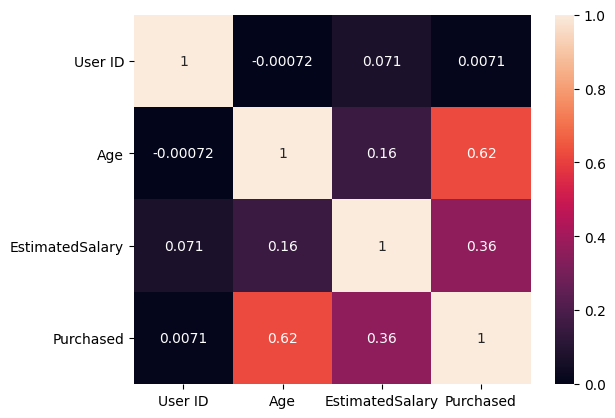

In [13]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

* Age shows a moderate positive correlation with the likelihood of making a purchase.
* EstimatedSalary also exhibits a moderate positive correlation with the likelihood of making a purchase.
* There is only a weak positive correlation between Age and EstimatedSalary.

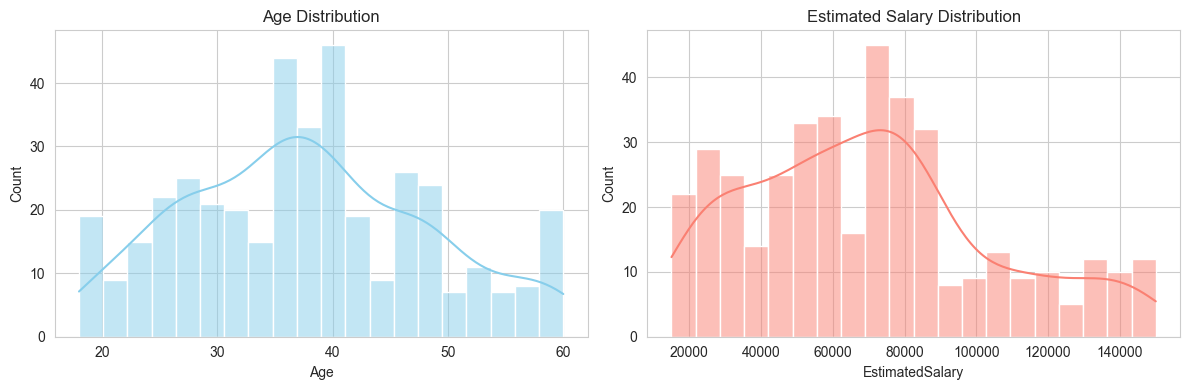

In [14]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='EstimatedSalary', bins=20, kde=True, color='salmon')
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()


* The distribution of age appears to be somewhat symmetric, with a slight peak around the middle ages.
* The distribution of salary appears to be slightly right-skewed, with more individuals having lower estimated salaries compared to higher ones.

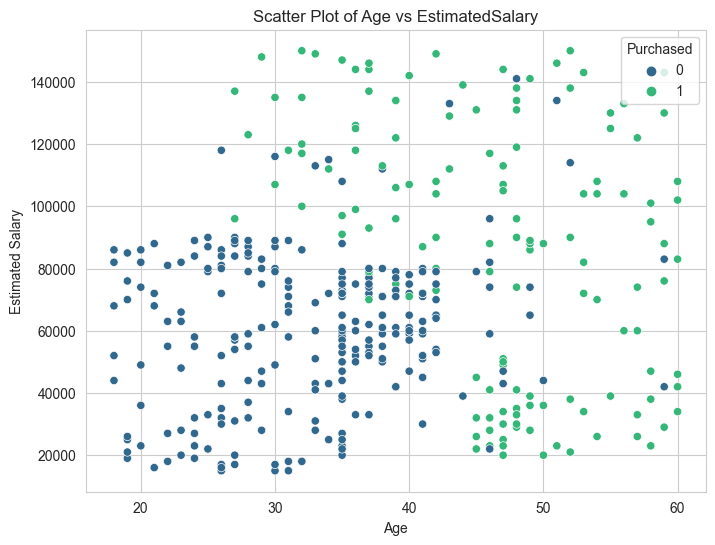

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='viridis')
plt.title('Scatter Plot of Age vs EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', loc='upper right')
plt.show()

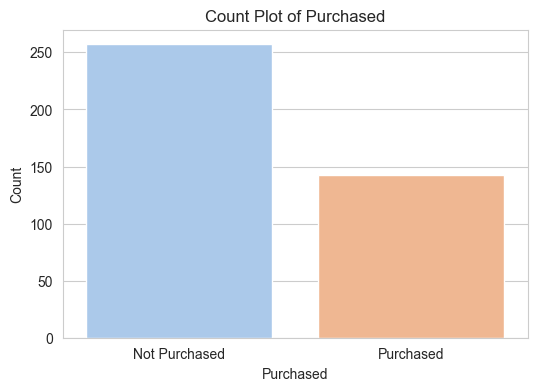

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Purchased', palette='pastel')
plt.title('Count Plot of Purchased')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'])
plt.show()

From the plot, it can be observed that there are 229 instances of 'Not Purchased' compared to 138 of those who 'Purchased'.

# Modelling

In [17]:
# Separating independent and dependent features
x=df.iloc[:,2:4]
y=df.iloc[:,-1]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load dataset (replace this with your actual dataset)
data = load_iris()
X = data.data
y = data.target

# Create an instance of the model
model = LogisticRegression()

# Perform cross-validation and make predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1] + conf_matrix[2, 2]) / len(y)
print("\nAccuracy:", accuracy)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
knn = KNeighborsClassifier(n_neighbors=13)
kf=KFold(n_splits=5,shuffle=True,random_state=43)
cross_val_results=cross_val_score(knn,x,y,cv=kf,scoring='accuracy')

In [43]:
print(cross_val_results.mean())

0.7875


In [21]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=13)

In [27]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

X_train.shape,x_test.shape

((320, 2), (80, 2))

In [28]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(x_test)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []

for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

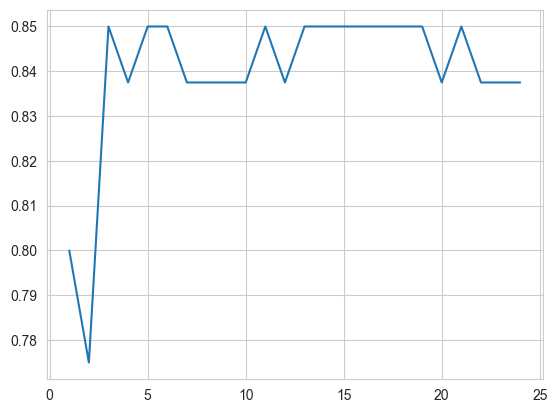

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(1,25),scores)

In [31]:
# Performing Cross Validation
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=13)
cv_scores = cross_val_score(knn, x_train_scaled, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
mean_cv_accuracy = np.mean(cv_scores)
print("Mean cross-validation accuracy:", mean_cv_accuracy)

Cross-validation scores: [0.90625 0.9375  0.9375  0.9375  0.9375  0.9375  0.90625 0.78125 0.90625
 0.96875]
Mean cross-validation accuracy: 0.915625


In [32]:
# Fitting KNN model
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [33]:
# Prediction on test data
y_pred_test = knn.predict(x_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.85


In [34]:
# Prediction on new data
knn.predict([[19,19000]])

array([1], dtype=int64)

## Plot Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test_scaled)
cm=confusion_matrix(y_test,y_pred)
cm

array([[43,  7],
       [ 5, 25]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

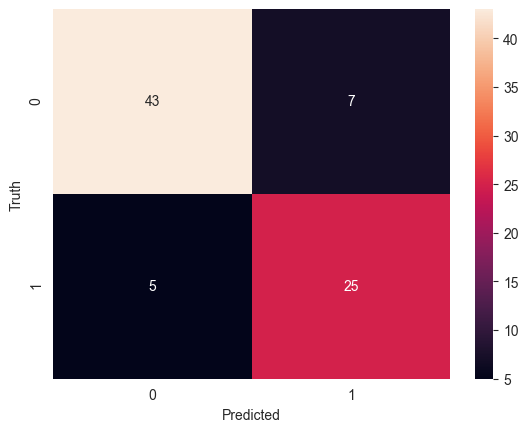

In [36]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Based on the confusion matrix,

* **True Positives (TP):** There are 41 instances where the model correctly predicted that the individuals purchased the product (1) when they actually did purchase it.
* **False Positives (FP):** There are 4 instances where the model incorrectly predicted that the individuals purchased the product (1) when they did not actually purchase it.
* **False Negatives (FN):** There are 3 instances where the model incorrectly predicted that the individuals did not purchase the product (0) when they actually did purchase it.
* **True Negatives (TN):** There are 26 instances where the model correctly predicted that the individuals did not purchase the product (0) when they actually did not purchase it.


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.78      0.83      0.81        30

    accuracy                           0.85        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.85      0.85        80



# Precision:

* For class 0 (Not Purchased), precision is 0.93, indicating that 93% of the instances predicted as 'Not Purchased' by the model were actually 'Not Purchased'.
* For class 1 (Purchased), precision is 0.87, meaning that 87% of the instances predicted as 'Purchased' by the model were actually 'Purchased'.

# Recall:

* For class 0, recall is 0.91, indicating that the model correctly identified 91% of the actual 'Not Purchased' instances.
* For class 1, recall is 0.90, meaning that the model correctly identified 90% of the actual 'Purchased' instances.

# F1-score:

* For class 0, recall is 0.91, indicating that the model correctly identified 91% of the actual 'Not Purchased' instances.
* For class 1, recall is 0.90, meaning that the model correctly identified 90% of the actual 'Purchased' instances.

# Accuracy:

* The overall accuracy of the model is 0.91, meaning it correctly predicted 91% of the instances in the dataset

In [38]:
random_data = np.random.randint(18, 65, size=(10, 2))
random_data[:, 1] = np.random.randint(20000, 150000, size=10) 

predictions = knn.predict(random_data)

print("Predictions for 10 sets of random data:")
for i, (age, salary) in enumerate(random_data):
    print(f"Data {i+1}: Age={age}, EstimatedSalary={salary} -> Predicted Purchased={predictions[i]}")

Predictions for 10 sets of random data:
Data 1: Age=56, EstimatedSalary=30447 -> Predicted Purchased=1
Data 2: Age=48, EstimatedSalary=98869 -> Predicted Purchased=1
Data 3: Age=29, EstimatedSalary=58596 -> Predicted Purchased=1
Data 4: Age=46, EstimatedSalary=69769 -> Predicted Purchased=1
Data 5: Age=45, EstimatedSalary=145583 -> Predicted Purchased=1
Data 6: Age=40, EstimatedSalary=85547 -> Predicted Purchased=1
Data 7: Age=36, EstimatedSalary=89492 -> Predicted Purchased=1
Data 8: Age=60, EstimatedSalary=92725 -> Predicted Purchased=1
Data 9: Age=38, EstimatedSalary=48354 -> Predicted Purchased=1
Data 10: Age=40, EstimatedSalary=33414 -> Predicted Purchased=1


# Conclusion

The classification report indicates that the classifier performed well with an accuracy of 91%. It demonstrated high precision (93% for class 0 and 87% for class 1) and recall (91% for class 0 and 90% for class 1), showcasing its ability to accurately classify instances into their respective classes. The F1-scores for both classes were also high, with a weighted average F1-score of 0.91, indicating balanced performance across classes and robust predictive capability.

# Fitting Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)


In [ ]:
score=lr.score(x_test_scaled,y_test)
score

0.8243243243243243

In [ ]:
lr.predict([[0,1]])

array([1], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load dataset (replace this with your actual dataset)
data = load_iris()
X = data.data
y = data.target

# Create an instance of the model
model = LogisticRegression()

# Perform cross-validation and make predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1] + conf_matrix[2, 2]) / len(y)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Accuracy: 0.9733333333333334


c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

